In [1]:
%load_ext autoreload
%autoreload 2


gene-expression (1000) → pyAgrum (greedy)


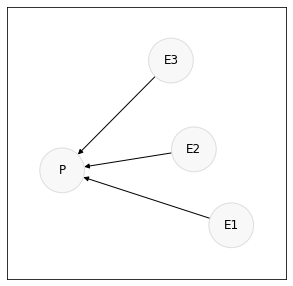

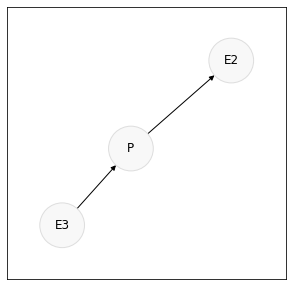

gene-expression (1000) → pyAgrum (local search)


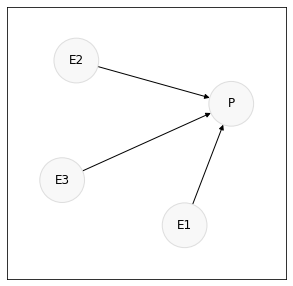

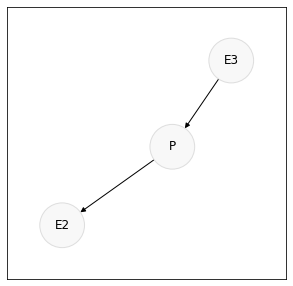

In [2]:
from __future__ import annotations

from typing import List

from datasets.DatasetInterface import DatasetInterface
from datasets.DelayedEffectDataset import DelayedEffectDataset
from datasets.GeneExpressionDataset import GeneExpressionDataset
from datasets.InstantActionDataset import InstantActionDataset
from datasets.LinearActionDataset import LinearActionDataset
from datasets.LogsDataset import LogsDataset
from datasets.MultipleCausesDataset import MultipleCausesDataset
from datasets.MultipleEffectsDataset import MultipleEffectsDataset
from datasets.SalesDataset import SalesDataset
from datasets.SensorsReadsDataset import SensorsReadsDataset
from datasets.ShadowCauseDataset import ShadowCauseDataset
from datasets.SinusoidalSeriesDataset import SinusoidalSeriesDataset
from generator.relation.RelationPlot import RelationPlot
from tester.scripts.CausalInferenceExampleScript import CausalInferenceExampleScript
from tester.scripts.CausalInferenceScript import CausalInferenceScript
from tester.scripts.DowhyScript import DowhyScript
from tester.scripts.MeDILExampleScript import MeDILExampleScript
from tester.scripts.MeDILScript import MeDILScript
from tester.scripts.PyAgrumScript import PyAgrumScript
from tester.scripts.ScriptInterface import ScriptInterface


def score_it(scripts: List[ScriptInterface], datasets: List[DatasetInterface]):
    for dataset in datasets:
        # Make sure dataset file was generated.
        dataset.get_data(force_rebuild=True)
        for script in scripts:
            print(f'{dataset.name} ({dataset.items}) → {script.name}')
            relations = script.predict(dataset)

            generator = dataset.get_generator()
            generator.plot_relations(fig_size=(5, 5))
            RelationPlot.show(generator.get_events(include_shadow=False), relations, figsize=(5, 5))


datasets = [
    GeneExpressionDataset(1000)
]

# http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/11-structuralLearning.ipynb.html
# learner.useLocalSearchWithTabuList()
# learner.useGreedyHillClimbing()

scripts = [
    PyAgrumScript(PyAgrumScript.LEARNER_GREEDY),
    PyAgrumScript(PyAgrumScript.LEARNER_LOCAL_SEARCH),
]

score_it(scripts, datasets)
